<br>

<br>
<h1 align="center">Evaluation in Supervised Machine Learning</h1>
<br>

**READINGS**

- [Scikit-Learn web-page](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix): 3.3. Metrics and scoring: quantifying the quality of predictions.

- [Paper](https://ai.stanford.edu/~ronnyk/2007GuideControlledExperiments.pdf): Kohavi, R., Henne, R. M., & Sommerfield, D. (2007). Practical guide to controlled experiments on the web. Proceedings of the 13th ACM SIGKDD international conference on Knowledge discovery and data mining - KDD '07. doi:10.1145/1281192.1281295

**KEY CONCEPTS**

- Understand why accuracy alone can be an inadequate metric for getting a more complete picture of a classifier's performance.
- Understand the motivation and definition of a variety of important evaluation metrics in machine learning and how to interpret the results of using a given evaluation metric.
- Optimize a machine learning algorithm using a specific evaluation metric appropriate for a given task.

---

# Model Evaluation & Selection

- [Reading on this topic](https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/): Machine Learning Mastery: How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification.

Evaluation is a key part in applied machine learning. Once a model is trained, the evaluation step provides critical feedback on the trained model's performance characteristics, particularly those that might be important for your application. The results of the evaluation step  might help you understand which data instances are being classified or predicted incorrectly, which might in turn suggest better features or different kernel function or
other refinements to your learning model in the feature and model refinement phase. 

Commercial search applications typically use a scorecard
of multiple evaluation metrics to make important business decisions.
Or development decisions about what models are chosen for use. So it's very important to choose evaluation
methods that match the goal of your application. 

**EVALUATION** is important since different applications have different goals. Moreover, despite that accuracy is widely used to evaluate a model, there are much more options worth studying. For example, in the health application, where a classifier is used to detect tumors in a medical
image, we may want the classifier to error on the side of caution.
And flag anything that even has a small chance of being cancerous.
Even if it means sometimes incorrectly classifying healthy tissue as diseased.
In this case, the classifier evaluation method
would try to reduce what are called **false negative predictions**. 

## Accuracy with Imbalaced Classes

<br>
<h5 align="center">Imbalanced classes are very common in machine learning scenarios, so
it's important to understand how to work with them. </h5>
<br>



Let us have a look at some cases where accuracy might not be enough to gain a good picture of what a classifier's doing. First, let's consider the case where we have a binary classification task,
where there are a lot of instances labeled with the negative class; but only a few instances that belong to the positive class (for instance, online search or recommender systems). In particular, let's assume that we have an e-commerce application.
Where for every 1,000 randomly sampled product items,
one of them is relevant to a user's need and the other 999 are not relevant. Recall that 

$$
    \text{Accuracy} = \frac{\#correct \: prediccions}{\#total \: instances}
$$

Let's suppose you develop a classifier for predicting relevant e-commerce items, and after you've finished the development,
you measure its accuracy on the test set to be 99.9%.
At first, that might seem to be amazingly good, right?
That's incredibly close to perfect. But let's compare that to a sklearn `dummy classifier`
that always just predicts the most likely class, namely, the not relevant class.
In other words, no matter what the actual instance is,
the `dummy classifier` will always predict that an item is not relevant: the accuracy of the `dummy classifier` is also going to be 99.9%.
So in reality our own classifier's performance isn't impressive at all; it's no better than just always predicting
The majority class without even looking at the data. 

**EXAMPLE OF CLASSIFICATION WITH IMBALACED CLASSES**

In [1]:
# Preamble

%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
# a nine to one ratio of negative to positive examples. 
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [4]:
# let's create a train test partition on this imbalance set and train with SVC(kernel="rbf")

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummyclassifier#sklearn.dummy.DummyClassifier)

`DummyClassifier` is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes. In other words, they are called that because they don't even look at the data to make a prediction.
They simply use the strategy or
rule of thumb that you instruct them to use, when creating them.
In fact, when you create the classifier, you set the strategy argument to tell it
what rule of thumb to use to make its predictions. You can ask for:

1. most_frequent: preficts the most frequent label in the training set.
2. stratified: random predictions based on training set class distribution.
3. uniform: generates presictions uniformly at random.
4. constant: always predicts a constant label provided by the user.<br>
    4.1. A major motivetion of this methid is FI-scoring, when the positive class is in the minority.

So here,
we set this to the most frequent strategy to predict the most frequent class. 

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
# Accuracy of the DummyClassifier
dummy_majority.score(X_test, y_test)

# So that support vector classifier was actually performing only very slightly better than the DummyClassifier. 

0.9044444444444445

<br>

The dummy classifier provides what is called a null accuracy baseline.
That is the accuracy that can be achieved by always picking the most frequent class.
You should not use a dummy classifier for real classification problems, but
it does provide a useful sanity check in point of comparison. There are other types of dummy classifiers that provide null base lines corresponding
to other choices of the strategy parameter as shown here. 

<br>

<img src="dummy_classifier.png" width=700 high = 600>

### What should we do if the classifier accuracy is close to the null accuracy baseline?

This could be a sign of:

1. Innefective, erroneous or missing features.
2. Poor choice of kernel or hyperparameter in the model.
3. Large class imbalance.

For instance, if we change the support vector classifier's `kernel` parameter to
`linear` from `rbf` and recompute the accuracy on this retrain classifier,
we can see that this leads to much better performance  of almost 98%
compared to the most frequently class based line of 90%. 

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

<br>

In general, for imbalanced classification problems, you should use metrics other than accuracy. We'll look at one shortly called AUC, which is short for area under the curve. 

### [`DummyRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html?highlight=dummyregression)

DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for
regression, and they serve a similar role as a null outcome baseline and
sanity check for regression models. Since regression models have continuous value prediction outputs.
The strategy parameter for DummyRegressors gives you a choice of function that
you can apply to the distribution of target values found in the training set.
You can ask for: 

1. mean: predicts the mean of the training targets.
2. median: oredicts the median of the training targets.
3. quantile: predicts a user-provided quantile of the training targets.
4. constant: predicts a constant user-provided value.

### [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[For more information](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

Now let's look more carefully at the different types
of outcomes we might see using a binary classifier.
This will give us some insight into why using
just accuracy doesn't give a complete picture of the classifier's performance. See the image below.

<h4 align="center">The Confusion Matrix for Binary Prediction Task</h4>

<img src="binary_classification_outcomes.png" width=700 high = 600>

**Type I error and type II error are terms from statistics.**

We're going to use these two-letter combinations, TN, FN, FP,
and TP, as variable names, when defining some new evaluation metrics shortly.
We'll also use capital N here to denote the total number of instances, of the sum
of all the values in the matrix, the number of data points we're looking at. 

**NOTICE** that this his also applies to multi-class classification,
in addition to the special case of binary classification I've shown here.
In the multi-class case with $k$ classes,
we simply have a k by k matrix instead of a two by two matrix. **In particular, the successful predictions of the classifier are on the diagonal
where the true class matches the predicted class.
The cells off the diagonal represent errors of different types.**

### Confusion Matrix in sklearn

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

"""True negative and false negative are in the first column, and true positive and
false positive are in the second column."""

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


'True negative and false negative are in the first column, and true positive and\nfalse positive are in the second column.'

In [9]:
# Here we apply the stratified DummyClassifier that gives random output in proportion to 
# the ratio labels in the training set. 

dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[368  39]
 [ 39   4]]


In [10]:
# we'll apply a support vector classifier with linear kernel and seed parameter equal to one. 

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
# we can apply a logistic regression classifier, and that obtains similar results to the support vector classifier.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/home/chinnasf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# finally, we can apply a decision tree classifier, and look at the confusion matrix that results from that. 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


One thing we notice is, that unlike the support vector or logistic regression
classifier, which had balanced numbers of false negatives and false positives.
The decision tree makes more than twice as many false negative errors,
17 of them actually, as false positive errors, of which there are 7.

Now that we've seen how a confusion matrix can give us a little more information
about the types of errors a classifier makes, we're ready to move ahead and and
define some new types of evaluation metrics that use information from
the computing matrix to give different perspectives on classifier performance 

## Confusion Matrices & Basic Evaluation Metrics

Let's look at this classification result visually to help
us connect these four numbers to a classifier's performance. 



<img src="different_errors_eg.png" width=700 high = 600>

The black points here are the instances with true class positive
namely the digit one and the white points have true class negative,
that is, there are all the other digits except for one.
The black line shows
a hypothetical linear classifier's decision boundary. The true positive points are those black points in
the positive prediction region and
false positives are those white points in the positive prediction region.
Likewise, true negatives are the white points in
the negative prediction region and
false negatives are black points in the negative prediction region. 

We've already seen one metric that can be derived from
the confusion matrix counts namely **accuracy**. But, let's look at some other evaluation metrics we can compute from these four numbers. A very simple related number that's sometimes used is **classification error**,
which is the sum of the counts off the diagonal
namely all of the errors divided by total instance count,
and numerically, this **is equivalent to just one minus the accuracy**. 

**Recall**, also known as the **true positive rate**,
**sensitivity** or **probability of detection** is such an evaluation metric and it's obtained
by **dividing the number of true positives
by the sum of true positives and false negatives**:

$$
    \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}} \quad \text{aka: sensitivity.}
$$

You can see from this formula that there are two ways to get a larger recall number: by either increasing the number of true positives or by reducing the number of false negatives. 

Now suppose that we have a machine learning task,
where it's really important to avoid false positives.
In other words, we're fine with cases where not all true positive instances
are detected but when the classifier does predict the positive class,
we want to be very confident that it's correct (a lot of customer facing prediction problems are like this).

**Precision** is an evaluation metric that reflects the situation
and is obtained by **dividing the number of
true positives by the sum of true positives and false positives**:

$$
    \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}
$$

So to increase precision,
we must either increase the number of true positives the classifier predicts or reduce
the number of errors where the classifier incorrectly
predicts that a negative instance is in the positive class. 

Another related evaluation metric that will be useful is called the **false positive rate (FPR)**, also known as **specificity**. This gives the fraction of all negative instances that the classifier incorrectly identifies as positive:

$$
    \text{FPR} = \frac{\text{FP}}{\text{TN}+\text{FP}} \quad \text{aka: specificity.}
$$

### Varying Precision and Recall

Going back to our classifier visualization (just the image above),
let's look at how **precision** and **recall** can be interpreted.
The numbers are:

$$
    \text{Precision} = \frac{13}{19} = 0.68; \quad \text{Recall} = \frac{13}{15} = 0.87. 
$$

derived from this classification scenario. We can see that a precision of 0.68 means that about 68 percent of the points in
the positive prediction region to the left of
the decision boundary or 13 out of the 19 instances are correctly labeled as positive. A recall of 0.87 means,
that of all true positive instances,
so all black points in the figure,
the positive prediction region has 'found about 87 percent of them' or 13 out of 15. 


If we wanted a classifier that was oriented towards higher levels of
precision like in the search engine query suggestion task, we might want a decision boundary instead that look like this:

<img src="different_errors_eg1.png" width=700 high = 600>

Now, all the points in
the positive prediction region seven out of seven are true positives,
giving us a perfect precision of 1.0.

Now, this comes at a cost because out of
the 15 total positive instances eight of them are now false negatives,
in other words, they're incorrectly predicted as being negative.
And so, recall drops to 7 divided by 15 or 0.47. 

Now, if we would want to minimize false negatives and obtain a high recall (for instance, for tumor detection), the model would look more like this:

<img src="different_errors_eg2.png" width=700 high = 600>

However, this also comes with a cost since the number of false positives,
things that the detector triggers as
possible tumors that are actually not, has gone up.
So, recall is a perfect 1.0 score but the precision has dropped to 15 out of 42 or 0.36.

These examples illustrate a classic trade-off
that often appears in machine learning applications.
Namely, that you can often increase the precision of
a classifier but the downside is that you may reduce recall,
or you could increase the recall of a classifier at the cost of reducing precision.

### Tradeoff Between Precision and Recall

**Recall-oriented machine learning tasks:** consequences of not correctly identifying a positive example can be high.

- Search and information extraction on legal discovery.
- Tumor detection.
- Often paired with a human expert to filter out false positives.

**Precision-otiented machine learning tasks:** consequences of false positive could be high.

- Search engine ranking, query suggestion.
- Document classification.
- Many customer-facing tasks (users remember failures!).

### F$_\beta$ score: combining precision and recall intoa a number
<br>

When evaluating classifiers, it's often convenient
to compute a quantity known as an F1 score,
that combines precision and recall into a single number.
Mathematically, this is based on
the **harmonic mean of precision and recall** using the formula. 

$$
    \text{F}_1 = 2\cdot\frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}} = \frac{2\cdot\text{TP}}{2\cdot\text{TP}+\text{FN}+\text{FP}}
$$

This F$_1$ score is a special case of
a more general evaluation metric known as an F-score that introduces a parameter $\beta$,
by adjusting beta we can control how much emphasis an evaluation is given to precision versus recall:

$$
    \text{F}_\beta = (1+\beta^2)\cdot\frac{\text{precision}\cdot\text{recall}}{(\beta^2\cdot\text{precision})+\text{recall}} = \frac{(1+\beta^2)\text{TP}}{(1+\beta^2)\cdot\text{TP} + \beta\cdot\text{FN}+\text{FP}}
$$

<br>

$\beta$ allows adjustment of the metric to control the emphasis on recall vs precision. For example: 

- **Precision-oriented users**: $\beta=$ 0.5 -- false positive hurt performance more than false negatives.

- **Recall-oriented users**: $\beta=$ 2 -- false negatives hurt performance more than false positives.

## Evaluation Metrics for Binary Classification in sklearn

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


<br>

It's often useful when analyzing
classifier performance to compute all of these metrics at once.
So, sklearn metrics provides a handy classification report function.
Like the previous core functions,
classification report takes the true and
predicted labels as the first two required arguments.
It also takes some optional arguments that control the format of the output. 

In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

"""The first set of results is from the dummy classifier and we can see
that as expected both precision and recall for the positive class are very
low since the dummy classifier is simply guessing randomly with low probability of
predicting that positive class for the positive instances."""

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.90      0.90       407
           1       0.09      0.09      0.09        43

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

'The first set of results is from the dummy classifier and we can see\nthat as expected both precision and recall for the positive class are very\nlow since the dummy classifier is simply guessing randomly with low probability of\npredicting that positive class for the positive instances.'

# Classifier Decision Functions

Many classifiers in scikit learn can provide information about the uncertainty
associated with a particular prediction either by using the `decision_function`
method or the `predict_proba` method.

#### `decision_function`

- Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large magnitude positive values) or the negative class (large-magnitude negative values).

- Choosing a fixed decision threshold gives a classification rule.

- By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve.

#### `decision_function` in sklearn

Here's an example in the notebook showing the first few instances from our
classification problem using a logistic regression classifier.
We can see the instances in the negative class often have large magnitude
negative scores.
And indeed the instances in the positive class has positive scores from
the logistic regression classifier. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/home/chinnasf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828789710415887),
 (0, -19.382934394152574),
 (0, -29.198310871374666),
 (0, -21.74616301390569),
 (0, -22.642400098509587),
 (0, -11.806021319748641),
 (1, 6.496017456172696),
 (0, -23.35455735874357),
 (0, -27.543399260315095),
 (0, -26.88822046777965),
 (0, -31.862663180892145),
 (0, -22.486136378372347),
 (0, -25.317995956026135),
 (0, -13.384568756776714),
 (0, -13.565604833932506),
 (0, -13.308409739563656),
 (1, 12.180762745040676),
 (0, -34.362499899954386),
 (0, -13.231499061997486),
 (0, -29.593929649562384)]

#### `predict_proba`

Also redicts the probability of Class Membership. 

- Typical rule: chosse most likely class (e.g. Class I if threshold > 0.50)
- Adjusting threshold affects predictions of classifier.
- Higher threshold means that a classifier has to be more confident
in predicting the class (e.g.: predict Class I only if the estimated probability of Class
I was over 70%; this results in a more conservative classifier. ).<br>
    - This increases precision. Does not predict Class I as often, but when it does, it gets high proportion of Class I instances correct.
- Not all models provide realistic probability estimates.

#### `predict_proba` in sklearn

Here's an example of getting these prediction probabilities for
the test instances for the same logistic regression classifier. You can see that many entries with a positive label of one,
have a high probability like 0.995.
While many negative label instances have a very low prediction probability. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

/home/chinnasf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105068119991887e-13),
 (0, 3.820309495013176e-09),
 (0, 2.0860980046037808e-13),
 (0, 3.5955174458211e-10),
 (0, 1.4673394034808194e-10),
 (0, 7.4594506995542055e-06),
 (1, 0.9984928363270268),
 (0, 7.198543141709231e-11),
 (0, 1.091575270912071e-12),
 (0, 2.1018137199592535e-12),
 (0, 1.4528514186393524e-14),
 (0, 1.7155171003267961e-10),
 (0, 1.0104947545452244e-11),
 (0, 1.5387036288767473e-06),
 (0, 1.283902721246038e-06),
 (0, 1.6604674480383538e-06),
 (1, 0.9999948718617208),
 (0, 1.1927678073444085e-15),
 (0, 1.7932142908778095e-06),
 (0, 1.4044932468963977e-13)]

<br>

Note that not all models provide useful probability estimates of this type.
For example, a model that was over-fit to a trending set,
might provide overly optimistic high probabilities that were in fact
not accurate. Now, we can use these decision scores or prediction probabilities for
getting more complete evaluation picture of a classifiers performance. 

For a particular application, we might pick a specific decision threshold
depending on whether we want the classifier to be more or
less conservative about making false-positive or false-negative errors.
It might not be entirely clear when developing a new model,
what the right decision threshold would be, and
how that choice will affect evaluation metrics like precision and recall.
So instead, what we'll do is,
look at how classifier performs for all possible decision thresholds.
This example shows how that works.

<img src="decision_threshold_eg.png" width=700 high = 600>

So, if we pick the specific threshold, let us say -20, the positive class will be the ones above the threshold value and the negative class will be the ones below the threshold value; so we do a partition to the test points, as shown in the figure. In this case, we have 12 instances in the negative class; they're being predicted as positive and only four of them  are actually positive and so the **precision here is 4 divided by 12 or approximately 0.34**. 

The recall on the other hand, there are four positive labeled instances in the whole set of test examples here and we've found all of them with this particular threshold setting.
So the **recall here is 4 out of 4**, we found all four positive labeled examples. For this particular threshold of -20, we can obtain precision on re cost score for that threshold. 

If the threshold were -10, we would obtain a precision of 0.67  and a recall of 1.

That is how the **precision-recall curve** is created; shown in the right hand side of the figure.  In this way, we can get a more complete picture by varying the threshold
of how the precision and recall of the result and
classifier output changes as a function of the decision threshold. 

## Precision-recall and ROC curves

Precision-Recall Curves are very widely used evaluation method from machine
learning, the x axis shows precision and
the y axis shows recall. Now an ideal classifier would be able to achieve perfect precision of 1.0 and
perfect recall of 1.0.
So the optimal point would be up here in the top right.

In general, with precision-recall curves, the closer in some sense,
the curve is to the top right corner, the more preferable it is,
the more beneficial the tradeoff it gives between precision and recall.
As we saw , there is a tradeoff between those two quantities with many classifiers. 

### Precision-recall curves in sklearn

<IPython.core.display.Javascript object>


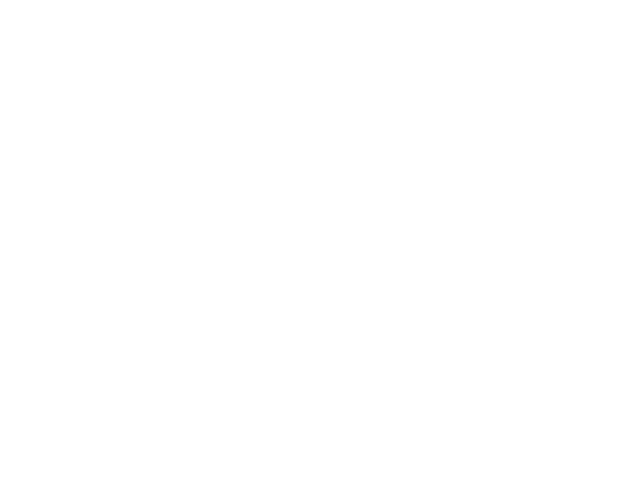

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.gca().set_aspect('equal')
plt.legend(frameon=False, loc=3)
plt.show()

So you can see that in this particular application
there is a general downward trend. The precision of the classifier goes up, the recall tends to go down. 

In this particular case you'll see also that It's not exactly a smooth curve; this is a consequence of how the formulas for precision and recall are computed.
They use discrete counts that include the number of true positives, as the decision threshold increases, there are fewer and
fewer points that remain as positive predictions.
So the fractions that are computed for these smaller numbers can
change pretty dramatically with small changes in the decision threshold. That's why these sort of trailing edges of
the Precision-recall curve can appear a bit jagged when you plot them. 

## ROC Curves

Receiver Operating Characteristic curves (ROC) curves are also widely used as a visualization methid to illustrate the performance of a binary classifier. ROC curves on the X-axis show a classifier's False Positive Rate so
that would go from 0 to 1.0, and on the Y-axis they show
a classifier's True Positive Rate so that will also go from 0 to 1.0.

The ideal point in ROC space is one where the classifier achieves
zero, a false positive rate of zero, and a true positive rate of one: the upper left corner. 

Curves in ROC space represent different tradeoffs as
the decision boundary, the decision threshold is varied for the classifier.
So just as in the precision recall case, as we vary decision threshold,
we'll get different numbers of false positives and
true positives that we can plot on a chart. 

/home/chinnasf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


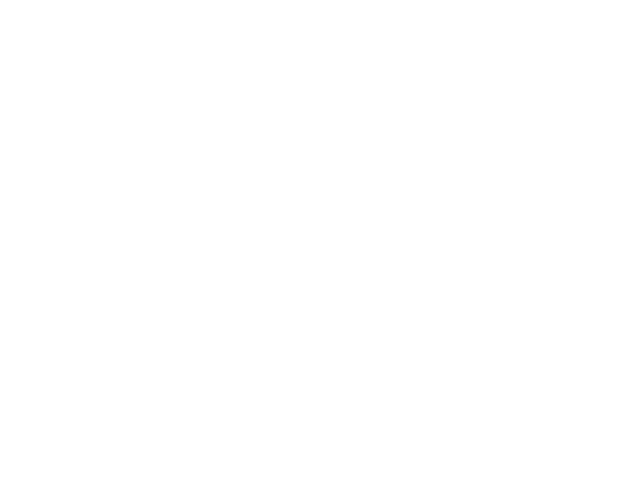

In [19]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC\ncurve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title("ROC curve (1-of-10\ndigits classifier)", fontsize=14)
plt.legend(loc=0, fontsize=10, frameon=False)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

The dotted line is the classifier curve that secretly results from a classifier that randomly guesses the label for binary class. It's basically like flipping a coin.
If you have two classes with equal numbers of positive and negative incidences, then
flipping a coin will get you randomly equal numbers of false positives and
true positives for a large virus data sets. 

In other words, the dotted line here is used as a base line. A bad classifier will have performance that is random or maybe even worse than random or be slightly better than random. Reasonably good classifier will give an ROC curve that is consistently better than
random across all decision threshold choices, while an excellent classifier would be one like I've shown here, which is way up into the left (this particular example is an example of a logistic regression classifier). 

The shape of the ROC curve can be important as well,
the steepness of the curve, we want classifiers that
maximize the true positive rate while minimizing the false positive rate.
Now, we can qualify the _goodness_ of a classifier, in some sense, by looking at how much area there is underneath the curve. 

We use something called area under the curve (AUC).
That's the single number that measures this total area underneath the ROC curve
as a way to summarize a classifier's performance.
So, an AUC of zero represents a very bad classifier, and
an AUC of one will represent an optimal classifier. 


<IPython.core.display.Javascript object>


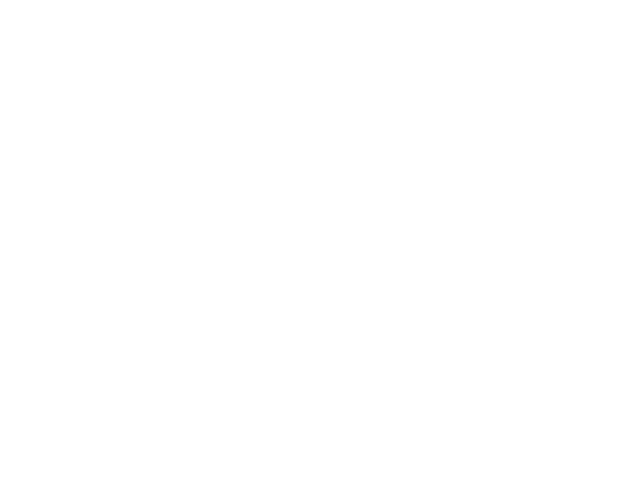

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [20]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11,frameon=False)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.gca().set_aspect('equal')

plt.show()

## Multi-Class Evaluation

**Multi-class evaluation is an extension of the binary case**

- A collection of true vs predicted binary outcomes, one per class.
- Confusion matrices are especially useful.
- Classification report that we saw in the binary case are easy to generate for the multi-class case. 

**Overall evaluation metrics are averages across classes**

- There are different ways to average multi-class results.
- The support (number of istances) for each class is important to consider, e.g. in case of imbalanced classes.

**Multi-label classification: each instance can have multiple labels**

### Multi-Class Confusion Matrix

The multi-class confusion matrix is a straightforward extension of the binary
classifier two by two confusion matrix. The rows are the _True Digits_ while the columns are the _Predicted Digits_. The correct predictions per class by the classifier are within the diagonal of the matrix;  whereas the misclassifications are off the diagonal.  

**EXAMPLE**

Comparing two confusion matrix, one with good accuracy and the other with low accuracy. The only change is to use an RBF, radial basis function kernel instead of a linear kernel. 

<IPython.core.display.Javascript object>


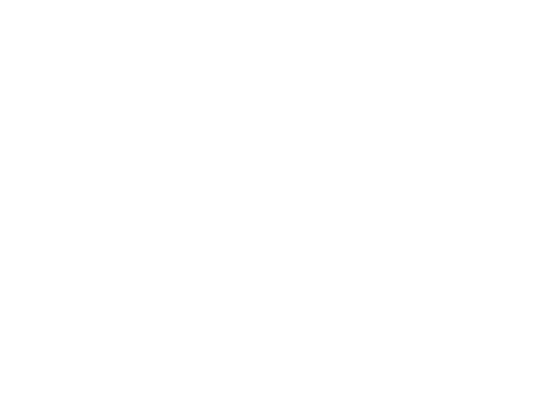

<IPython.core.display.Javascript object>


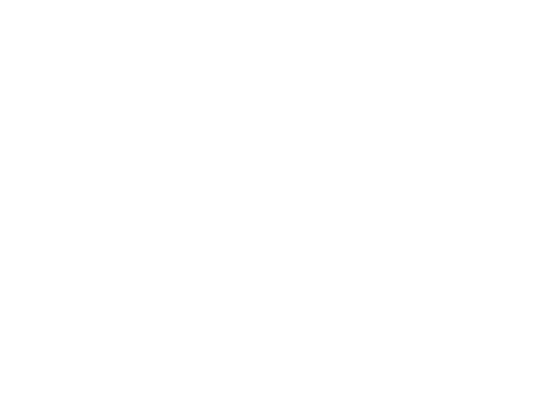

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

We can see that most
of the predictions are correct with only a few misclassifications here and there.
The most frequent type of mistake here is apparently misclassifying the true digit,
eight as a predicted digit one which happened three times, indeed, the overall accuracy is high, about 97% as shown here.

Keep in mind that it is useful to display a confusion matrix as a heat map
in order to highlight the relative frequencies of different types of errors. 

While we can see for the accuracy number were about 43% below the confusion matrix
that the classifier is doing much worse than the delinear kernel,
that single number doesn't give much insight into why. Looking at the confusion matrix, however, reveals that for every true digit class,
a significant fraction of outcomes are to predict the digit four.
That's rather surprising. 

Clearly, something is broken with this model and I picked this second example
just to show an extreme example of what you might see when things go quite wrong.
This digits dataset is well-established and free of problems.
But especially when developing with a new dataset,
**seeing patterns like this in a confusion matrix could give you valuable clues
about possible problems, say in the feature pre-processing for example**. 

<h3 align="center">Always try looking at the confusion matrix for your classifier so you get some insight into what kind of errors it is making for each class including whether some classes are much more prone to certain kinds of errors than others. </h3>

## Classification Report

Just as in the binary case,
you can get a classification report that summarizes multiple evaluation metrics for
a multi-class classifier with an average metric computed for each class. 

In [22]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Macro- vs Micro-Average

In macro-average, each class has equal weight. In order to get the macro-average, you need to compute the metric within each class and average the resulting metrics acrross the classes. For example: 

<img src="macro_average.png" width=700 high = 600>

Micro-Average precision gives each instance in the data results here equal weight;  we don't compute precision for each class separately. The entire dataset is treated as as an aggregate outcome. Here is another example

<img src="micro_average.png" width=700 high = 600>


**INSIGHTS**

- If the classes have about the same number of instances, macro- and micro-average will be about the same. 
- If some clases are much larger (more instances) than others, and you want to:<br>
    - weight your metric toward the largest ones, use micro-averaging.
    - weight your metric toward the smallest ones, use macro-averaging.
- If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance.
- If the macro-average is much lower than the micro-average then examine the smaller classes for poor metric performance. 

### Macro- vs Micro- Average in sklearn

Here, we use the average parameter on the scoring function.
In the first example, we used the precision metric and
specify whether we want micro-average precision which is the first case or
macro-average precision in the second case.
In the second example, we use the F1 metric and
compute micro and macro-averaged F1.

In [23]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [24]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


# Regression Evaluation

We could analyze a regression model's predictions and
categorize errors of one type (where the regression model's predicted value was much larger
than the target value) compared to a second error type (where the predicted value was much smaller than the target value). In practice though it turns out that for most applications of regression,
distinguishing between these types of different errors is not as important.
This simplifies evaluation for regression quite a bit. 

### Regression Metrics in sklearn

- `r2_score`: computes how well future instances will be predicted (0,1).
- `mean_absolute_error`: absolute difference of target and predicted values.<br>
    - This corresponds to the expected value of L1. 
    - In Machine Learning, this is sometimes used to asses focused outcomes for regression in time series analysis.
    - Does not distinguish between  over and under estimates.
- `means_squared_error`: squared difference of target and predicted values.<br>
    - This corresponds to the expected value of L2 norm loss.
    - Larger errors have correspondingly larger squared contributions to the mean error.
    - Does not distinguish between  over and under estimates.
- `median_absolute_error`: robust to outliers.<br>
    - Used to ignore the presence of an outlier.
    - Uses the median of the error distribution rather than the mean.

### Dummy Regressors and Regressor Metrics

This example shows a scatter plot using database on a single input variable,
which is plotted along the x axis from the diabetes data set. 

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


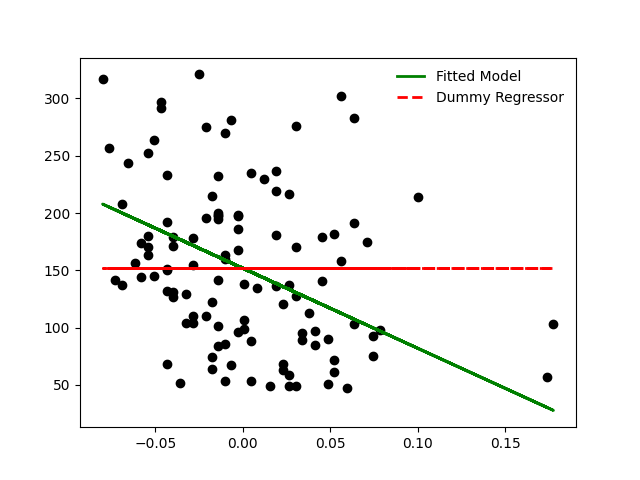

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2, label="Fitted Model")
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'Dummy Regressor')

plt.legend(frameon=False)
plt.show()

Looking at the regression metrics output from the linear model compared to
the dummy model. We can see that as expected the dummy regressor achieves an r squared
score of 0.

Since it always makes a constant prediction without looking at the output.
In this instance the linear model provides only slightly better fit than the dummy
regressor, according to both mean squared error and the r2_score. Remember that you could also create some other flavors of dummy regressors that always
predict the median of the training target values, or a particular quantile of
those values, or a specific custom constant value that you provide. 

Although regression typically has simpler evaluation needs than classification,
it does pay to double check to make sure the evaluation metric you choose for
a regression problem does penalize errors in a way
that reflects the consequences of those errors for
the business, organizational, or user needs of your application. 

# Model Selection: Optimizing Classifiers for Different Evaluation Metrics

<img src="model_selection.png">

The default evaluation metric used for a cross-val score or GridSearchCV is accuracy.
So how do you apply the new metrics you've learned about here like
AUC in model selection?
Scikit-learn makes this very easy.
You simply add a scoring parameter that's set to
the string with the name of the evaluation metric you want to use.

Let's first look at an example using the scoring parameter for cross-validation,
and then we'll take a look at the other primary method of model selection, grid search.


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


Now, here we're not doing any parameter tuning we're simply evaluating
our model's average performance across multiple folds. 

Now, in this grid search example we use
a support vector classifier that uses a radio basis function kernel. The critical parameter here is the gamma parameter that
intuitively sets the radius or width of influence of the kernel.

We'll use `GridSearchCV` to find the value of gamma
that optimizes a given evaluation metric in two cases. 

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_,"\n")

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676 

Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


<br>

**COMPLETE LIST OF NAMES FOR THE EVALUATION METRIC SUPPORTED BY THE SCORING PARAMETER:**

In [28]:
from sklearn.metrics import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']


<br>
Let's take a look at a specific example that shows
how a classifier's decision boundary changes
when it's optimized for different evaluation metrics.

This classification problem is based on
the same binary digit classifier training and
test sets we've been using as an example throughout the notebook. 

In these classification visualization examples, the positive examples,
the digit one are shown as black points and the region of
positive class prediction is shown in
the light-colored or yellow region to the right of this decision boundary.
The negative examples, all other digits,
are shown as white points.
And the region of negative class prediction here in
these figures is to the left of the decision boundary.

The data points have been plotted using two out of
the 64 future values in the digits' dataset and have been jittered a little; that is, I've added a little bit of random noise so we can see more easily the density of examples in the feature space.

**EXAMPLE'S CODE**

<IPython.core.display.Javascript object>


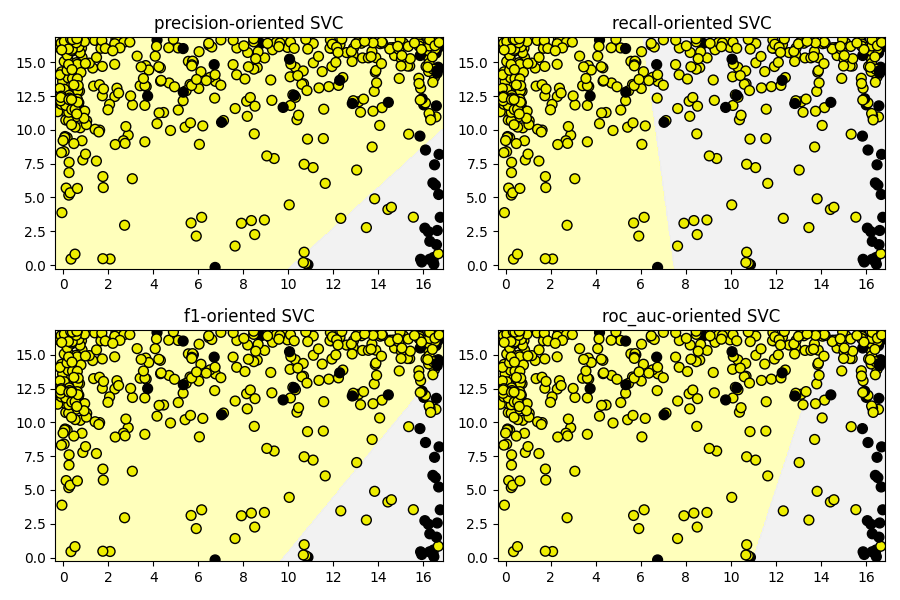

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5285474716202271
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5352575645533392
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8931128750819435


In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

<br>


As it turns out, optimizing for
different evaluation metrics results in
different optimal values of the class weight parameter.
As the class weight parameter increases,
more emphasis will be given to correctly classifying the positive class instances. 

he precision-oriented classifier we see here with class weight of two, tries hard to reduce false positives while increasing true positives. So it focuses on the cluster of positive class points in
the lower right corner where there are relatively few negative class points.
Here, precision is over 50 percent. 

In contrast, the recall-oriented classifier with class weight of 50,
tries hard to reduce the number of false negatives while increasing true positives.
That is, it tries to find most of
the positive class points as part of its positive class predictions. 

We can also see that the decision boundary for
the F1-oriented classifier has an optimal class weight of two,
which is between the optimal class weight values for
the precision and recall-oriented classifiers.
Visually we can see that the F1-oriented classifier also has a kind of
intermediate positioning between the precision and recall-oriented, decision boundaries.
This makes sense given that F1 is the harmonic mean of precision and recall. 

The AUC-oriented classifier with
optimal class weight to 5 has a similar decision boundary to the F1-oriented classifier,
but shifted slightly in favor of higher recall. 

**EXAMPLES'S DEFAULT-RECALL CURVE**

<IPython.core.display.Javascript object>


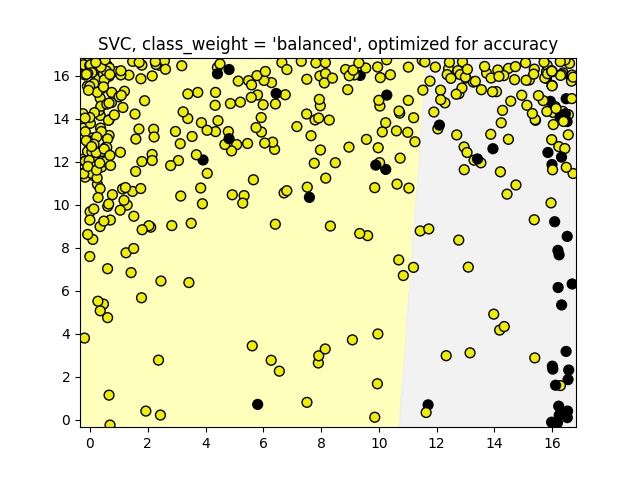

<IPython.core.display.Javascript object>


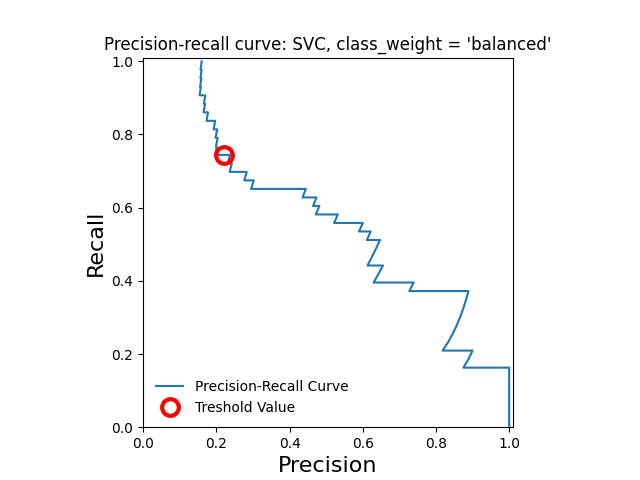

At zero threshold, precision: 0.22, recall: 0.74


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3,label="Treshold Value")
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.gca().set_aspect('equal')
plt.legend(frameon=False, loc="lower left")
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

<br>

We can see the precision recall trade-off
very clearly for this classification scenario in
the precision recall curve for
the default support vector classifier with
linear kernel optimized for accuracy on the same dataset,
and using the balanced option for the class weight parameter. 

Take a moment to
imagine how the extreme lower right part of
the curve on this precision recall curve represents
a decision boundary that's highly
precision-oriented in the lower right of the classification plot,
where there's a cluster of positive examples.
As the decision threshold is shifted to become less and less conservative,
tracing the curve up into the left,
the classifier becomes more and more like
the recall-oriented support vector classifier example. 

### Training, Validation, and Test Framework for Model Selection and Evaluation

- Using only cross-validation or a test set to do model selection may lead to more subtle overfitting/ optimistic generalization estimates. $^*$
- Isntead, use the three data splits:
    1. Training set (model building).
    2. VAlidation set (model selection).
    3. Test set (final evaluation).
- In practice:
    1. Create an initial training/ test split.
    2. Do cross-validation on the training data for model/parameter selection.
    3. Save the held-out test set for final model evaluation. 
    
The test set is not seen until the very end of the evaluation process.
Machine learning researchers take this protocol very seriously.
The train-validate-test design is
a very important universally applied framework for
effective evaluation of machine learning models.

$^*$ Data Leakage: the more influence any potential held-up test data
has played into selecting the final model, not merely evaluating it.

**CONCLUSION**

- Accuracy is often not the right evaluation metric for many real-world machine learning tasks:
    - False positives and false negatives may need to be treated very differently.
    - Make sure you understand the needs of your apllication and choose an evaluation metric that matches your application, user, or business goals.
    
    
- Examples of additional evaluation methos that **you need to revise (since they are not included in the notes)**:
    - Learning curve: how much does accuracy (or other metric) change as a function of the amount of training data? These are useful as part of a cost-benefit analysis. Gathering training data in the form of labeled examples is often time-consuming and expensive. So being able to estimate the likely performance improvement of your classifier, if you say invest in doubling the amount of training data, can be a useful analysis. 
    
    - Sensitivity analysis: how much does accuracy (or other metric) change as a function of key learning parameter values? This may be important to perform especially if there are other costs such as runtime efficiency that are critical variables when deploying an operational system, that are correlated with different values of parameter. For example, decision tree depth or future value threshold. In this way, a more complete picture of the trade-offs achievable across different performance dimensions can help you make the best practical deployment decisions for your machine learning model. 